In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

In [138]:
df=pd.read_excel('Online Retail.xlsx')

In [94]:
df.shape

(541909, 8)

In [95]:
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [96]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [139]:
def descr(df):
    no_rows = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.unique())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    nan_percent = (df.isnull().sum() / no_rows) * 100
    
    numeric_df = df.select_dtypes(include=[np.number])
    skewness = numeric_df.skew()
    kurtosis = numeric_df.kurt()
    
    cols = {
        'dtypes': types,
        'counts': counts,
        'distincts': distincts,
        'nulls': nulls,
        'missing_percent': nan_percent,
        'uniques': uniques,
        'skewness': skewness,
        'kurtosis': kurtosis
    }
    
    table = pd.DataFrame(data=cols)
    return table

details = descr(df)
display(details.sort_values(by='missing_percent', ascending=False))



,dtypes,counts,distincts,nulls,missing_percent,uniques,skewness,kurtosis
CustomerID,float64,406829,4373,135080,24.926694,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...",0.029835,-1.179982
Description,object,540455,4224,1454,0.268311,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",NaN,NaN
Country,object,541909,38,0,0.000000,"[United Kingdom, France, Australia, Netherland...",NaN,NaN
InvoiceDate,datetime64[ns],541909,23260,0,0.000000,"[2010-12-01 08:26:00, 2010-12-01 08:28:00, 201...",NaN,NaN
InvoiceNo,object,541909,25900,0,0.000000,"[536365, 536366, 536367, 536368, 536369, 53637...",NaN,NaN
Quantity,int64,541909,722,0,0.000000,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...",-0.264076,119769.160031
StockCode,object,541909,4070,0,0.000000,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,...",NaN,NaN
UnitPrice,float64,541909,1630,0,0.000000,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...",186.506972,59005.719097


In [140]:
print("Number of rows where negative values are present : ", 
      df[(df['Quantity']<0) | (df['UnitPrice']<0)].shape[0])

print("\nAre negative values in both Quantity and UnitPrice present in same row : ", end="")
if df[(df['Quantity']<0) & (df['UnitPrice']<0)].shape[0] == 0:
    print("No")
else:
    print("Yes")

print("\nAre negative or 0 values in both Quantity and UnitPrice present in same row : ", end="")
if df[(df['Quantity']<=0) & (df['UnitPrice']<=0)].shape[0] == 0:
    print("No")
else:
    print("Yes")

print("What is the customer ID of such rows :",
      df.loc[(df.Quantity<=0) & (df.UnitPrice<=0), ['CustomerID']].CustomerID.unique())

print("\nInvoice Numbers of rows with quantity having negative values : ")
print(df.loc[(df.Quantity<0) & ~(df.CustomerID.isnull()), 'InvoiceNo'])

print("\nAll the Invoice Numbers start with : ", 
      df.loc[(df.Quantity<0) & ~(df.CustomerID.isnull()), 'InvoiceNo']
      .astype(str)  
      .apply(lambda x: x[0]) 
      .unique())

print("\nInvoice Numbers of rows with UnitPrice having negative values : ") 
display(df[(df.UnitPrice<0) & (df.CustomerID.isnull())])

print("\nAll the Invoice Numbers start with : ", 
      df.loc[(df.UnitPrice<0) & (df.CustomerID.isnull()), 'InvoiceNo']
      .astype(str) 
      .apply(lambda x: x[0])  
      .unique())

print("\nInvoice Numbers of rows with UnitPrice having 0 values : ") 
display(df[(df.UnitPrice==0) & ~(df.CustomerID.isnull())].head(10))

print("Total number of rows : ", df[(df.UnitPrice==0) & ~(df.CustomerID.isnull())].shape[0])

print("\nAll the Invoice Numbers start with : ", 
      df.loc[(df.UnitPrice==0) & ~(df.CustomerID.isnull()), 'InvoiceNo']
      .astype(str)  
      .apply(lambda x: x[0])  
      .unique())


Number of rows where negative values are present :  10626

Are negative values in both Quantity and UnitPrice present in same row : No

Are negative or 0 values in both Quantity and UnitPrice present in same row : Yes
What is the customer ID of such rows : [nan]

Invoice Numbers of rows with quantity having negative values : 
141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 8905, dtype: object

All the Invoice Numbers start with :  ['C']

Invoice Numbers of rows with UnitPrice having negative values : 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom



All the Invoice Numbers start with :  ['A']

Invoice Numbers of rows with UnitPrice having 0 values : 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


Total number of rows :  40

All the Invoice Numbers start with :  ['5']


In [141]:
print("Invoice Numbers of rows with quantity having negative values : ") 
print(df.loc[(df.Quantity<0) & ~(df.CustomerID.isnull()), 'InvoiceNo'])
print("\nAll the Invoice Numbers start with : ", df.loc[(df.Quantity<0) & ~(df.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())

Invoice Numbers of rows with quantity having negative values : 
141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 8905, dtype: object

All the Invoice Numbers start with :  ['C']


In [100]:
print("Invoice Numbers of rows with UnitPrice having negative values : ") 
display(df[(df.UnitPrice<0) & (df.CustomerID.isnull())])

print("\nAll the Invoice Numbers start with : ", 
      df.loc[(df.UnitPrice<0) & (df.CustomerID.isnull()), 'InvoiceNo']
      .astype(str)  
      .apply(lambda x: x[0] if pd.notna(x) else '')  
      .unique())

print("\nInvoice Numbers of rows with UnitPrice having 0 values : ") 
display(df[(df.UnitPrice==0) & ~(df.CustomerID.isnull())].head(10))

print("Total number of rows : ", df[(df.UnitPrice==0) & ~(df.CustomerID.isnull())].shape[0])

print("\nAll the Invoice Numbers start with : ", 
      df.loc[(df.UnitPrice==0) & ~(df.CustomerID.isnull()), 'InvoiceNo']
      .astype(str)  
      .apply(lambda x: x[0] if pd.notna(x) else '')  
      .unique())


Invoice Numbers of rows with UnitPrice having negative values : 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom



All the Invoice Numbers start with :  ['A']

Invoice Numbers of rows with UnitPrice having 0 values : 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


Total number of rows :  40

All the Invoice Numbers start with :  ['5']


In [142]:
df=df[~(df.CustomerID.isnull())]
df = df[~(df.Quantity<0)]
df = df[df.UnitPrice>0]
df.reset_index()
details = descr(df)
display(details.sort_values(by='distincts', ascending=False))
print(df.shape)

,dtypes,counts,distincts,nulls,missing_percent,uniques,skewness,kurtosis
InvoiceNo,object,397884,18532,0,0.0,"[536365, 536366, 536367, 536368, 536369, 53637...",NaN,NaN
InvoiceDate,datetime64[ns],397884,17282,0,0.0,"[2010-12-01 08:26:00, 2010-12-01 08:28:00, 201...",NaN,NaN
CustomerID,float64,397884,4338,0,0.0,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...",0.025729,-1.180822
Description,object,397884,3877,0,0.0,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",NaN,NaN
StockCode,object,397884,3665,0,0.0,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,...",NaN,NaN
UnitPrice,float64,397884,440,0,0.0,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...",204.032727,58140.396673
Quantity,int64,397884,301,0,0.0,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...",409.892972,178186.243253
Country,object,397884,37,0,0.0,"[United Kingdom, France, Australia, Netherland...",NaN,NaN


(397884, 8)


In [143]:
dfv=df.copy()                               

In [144]:
x=dfv['StockCode'].value_counts()
item_type_mapping={}
item_list=x.index
for i in range(0,len(item_list)):
    item_type_mapping[item_list[i]]=i

dfv['StockCode']=dfv['StockCode'].map(lambda x:item_type_mapping[x]) 

In [145]:
dfv['amount'] = dfv.Quantity*dfv.UnitPrice
dfv['amount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: amount, Length: 397884, dtype: float64

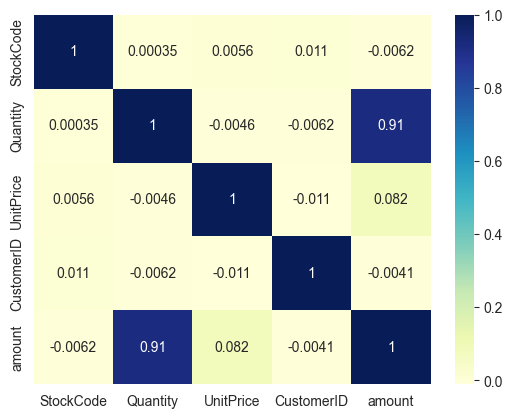

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt


dfv_numeric = dfv.select_dtypes(include=['number'])


corr_matrix = dfv_numeric.corr()


sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


array([[<Axes: xlabel='StockCode', ylabel='StockCode'>,
        <Axes: xlabel='Quantity', ylabel='StockCode'>,
        <Axes: xlabel='UnitPrice', ylabel='StockCode'>,
        <Axes: xlabel='CustomerID', ylabel='StockCode'>,
        <Axes: xlabel='amount', ylabel='StockCode'>],
       [<Axes: xlabel='StockCode', ylabel='Quantity'>,
        <Axes: xlabel='Quantity', ylabel='Quantity'>,
        <Axes: xlabel='UnitPrice', ylabel='Quantity'>,
        <Axes: xlabel='CustomerID', ylabel='Quantity'>,
        <Axes: xlabel='amount', ylabel='Quantity'>],
       [<Axes: xlabel='StockCode', ylabel='UnitPrice'>,
        <Axes: xlabel='Quantity', ylabel='UnitPrice'>,
        <Axes: xlabel='UnitPrice', ylabel='UnitPrice'>,
        <Axes: xlabel='CustomerID', ylabel='UnitPrice'>,
        <Axes: xlabel='amount', ylabel='UnitPrice'>],
       [<Axes: xlabel='StockCode', ylabel='CustomerID'>,
        <Axes: xlabel='Quantity', ylabel='CustomerID'>,
        <Axes: xlabel='UnitPrice', ylabel='CustomerID'>,
 

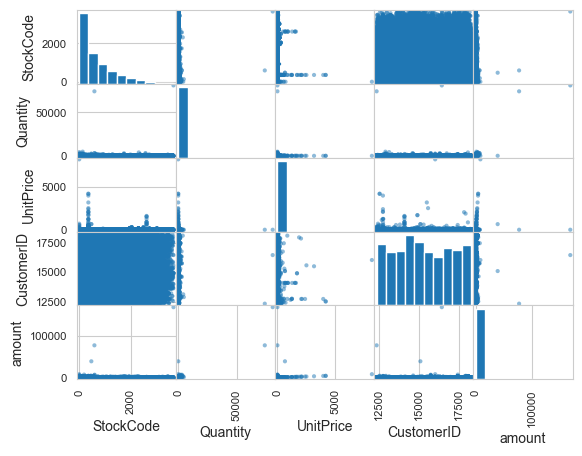

In [106]:
pd.plotting.scatter_matrix(dfv)

In [147]:
dfv = dfv[~(dfv.Quantity>dfv.Quantity.quantile(0.95))]
dfv = dfv[~(dfv.UnitPrice>dfv.UnitPrice.quantile(0.95))]

array([[<Axes: xlabel='StockCode', ylabel='StockCode'>,
        <Axes: xlabel='Quantity', ylabel='StockCode'>,
        <Axes: xlabel='UnitPrice', ylabel='StockCode'>,
        <Axes: xlabel='CustomerID', ylabel='StockCode'>,
        <Axes: xlabel='amount', ylabel='StockCode'>],
       [<Axes: xlabel='StockCode', ylabel='Quantity'>,
        <Axes: xlabel='Quantity', ylabel='Quantity'>,
        <Axes: xlabel='UnitPrice', ylabel='Quantity'>,
        <Axes: xlabel='CustomerID', ylabel='Quantity'>,
        <Axes: xlabel='amount', ylabel='Quantity'>],
       [<Axes: xlabel='StockCode', ylabel='UnitPrice'>,
        <Axes: xlabel='Quantity', ylabel='UnitPrice'>,
        <Axes: xlabel='UnitPrice', ylabel='UnitPrice'>,
        <Axes: xlabel='CustomerID', ylabel='UnitPrice'>,
        <Axes: xlabel='amount', ylabel='UnitPrice'>],
       [<Axes: xlabel='StockCode', ylabel='CustomerID'>,
        <Axes: xlabel='Quantity', ylabel='CustomerID'>,
        <Axes: xlabel='UnitPrice', ylabel='CustomerID'>,
 

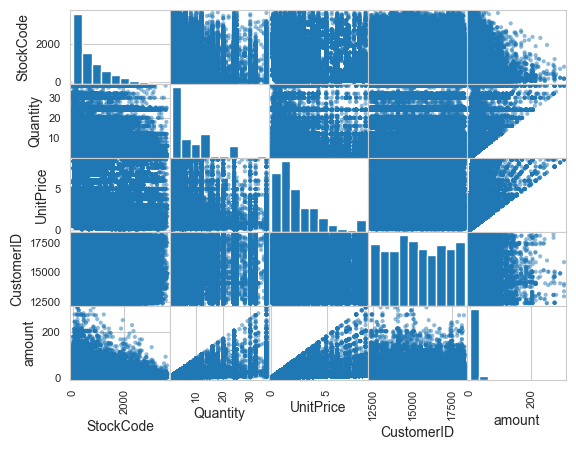

In [108]:
pd.plotting.scatter_matrix(dfv)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2992\2183638143.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\KIIT\AppData\Local\Temp\ipykernel_2992\2183638143.py:5: UserWarning:


The palette list has fewer values (30) than needed (37) and will cycle, which may produce an uninterpretable plot.



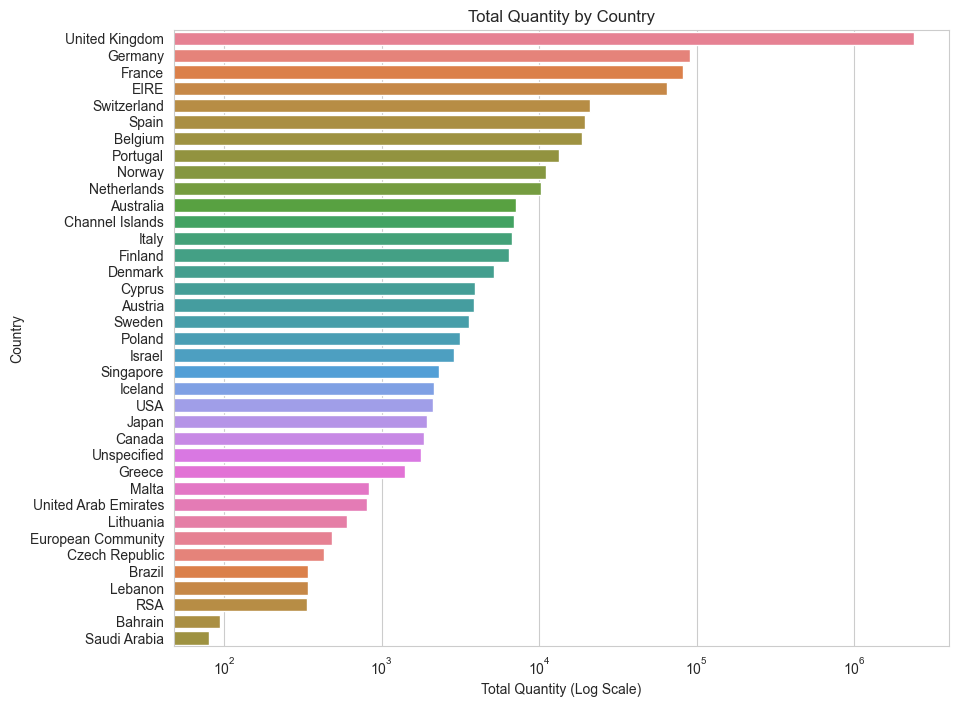

In [148]:

colors = sns.color_palette('husl', 30)
country_quantity = dfv.groupby('Country').Quantity.sum().sort_values(ascending=False)
country_quantity_sorted = country_quantity.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=country_quantity_sorted.values, y=country_quantity_sorted.index, palette=colors)
plt.title('Total Quantity by Country')
plt.xlabel('Total Quantity (Log Scale)')
plt.ylabel('Country')
plt.xscale('log')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2992\753677232.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




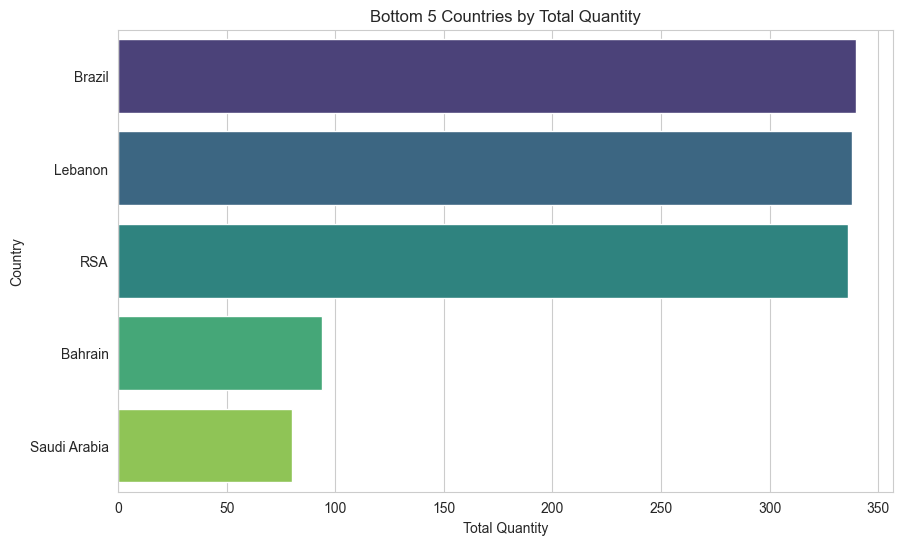

In [149]:

bottom_5_countries = country_quantity_sorted.tail(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_countries.values, y=bottom_5_countries.index, palette='viridis')
plt.title('Bottom 5 Countries by Total Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.show()

In [150]:
dfv['year'] = dfv['InvoiceDate'].dt.year
dfv['month'] = dfv['InvoiceDate'].dt.month
dfv['hour'] = dfv['InvoiceDate'].dt.hour
dfv['weekday'] = dfv['InvoiceDate'].dt.day_name()

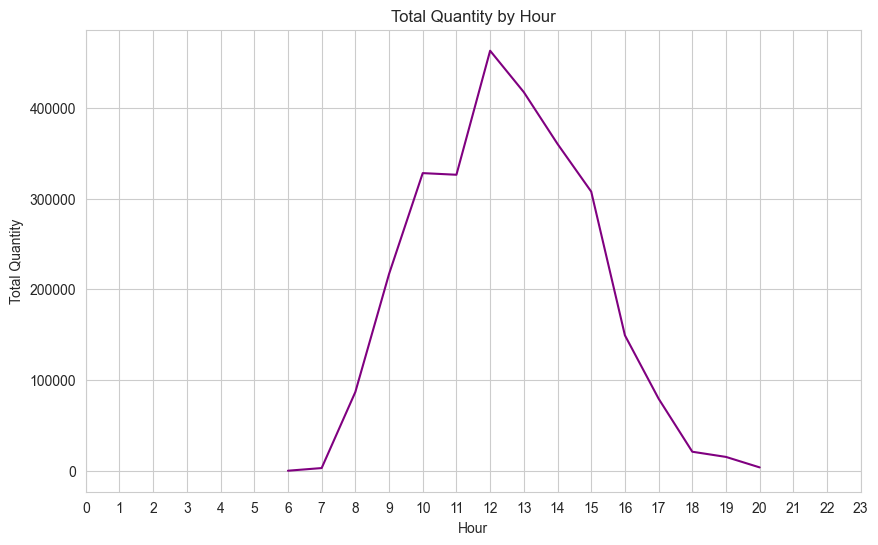

In [112]:

dfv.groupby('hour')['Quantity'].sum().plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Total Quantity by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Quantity')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

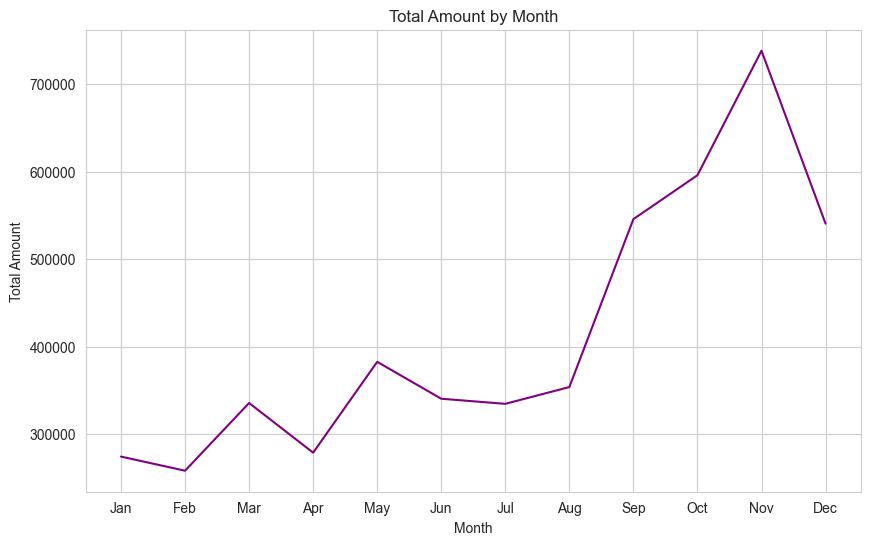

In [123]:

dfv.groupby('month')['amount'].sum().plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

<Axes: xlabel='year'>

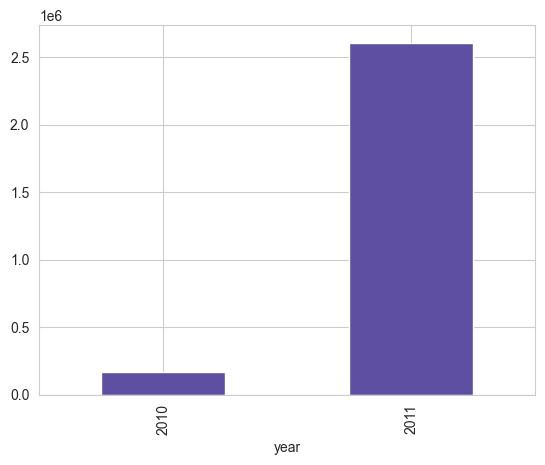

In [114]:
dfv.groupby('year')['Quantity'].sum().plot(kind='bar',colormap = 'Spectral_r')

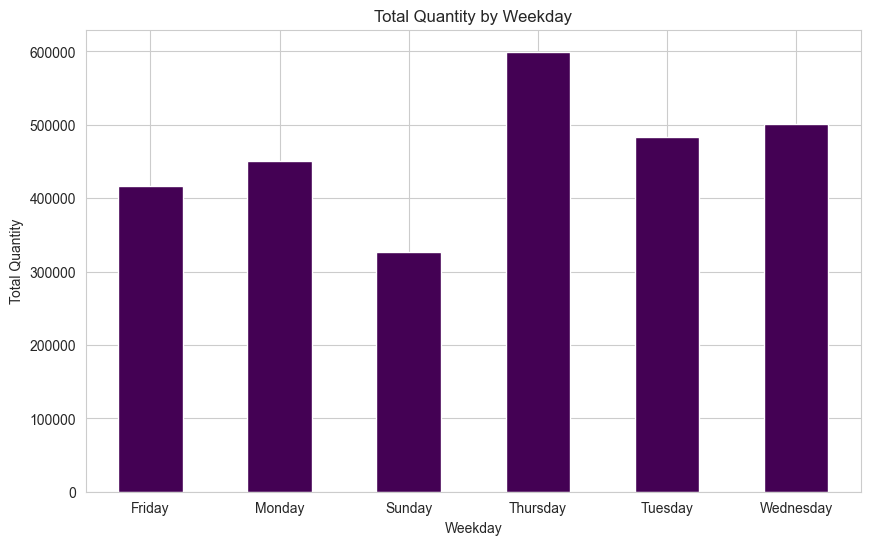

In [151]:
dfv.InvoiceDate.sort_values()
dfv.groupby('weekday')['Quantity'].sum().plot(kind='bar', colormap='viridis', figsize=(10, 6))
plt.title('Total Quantity by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.show()

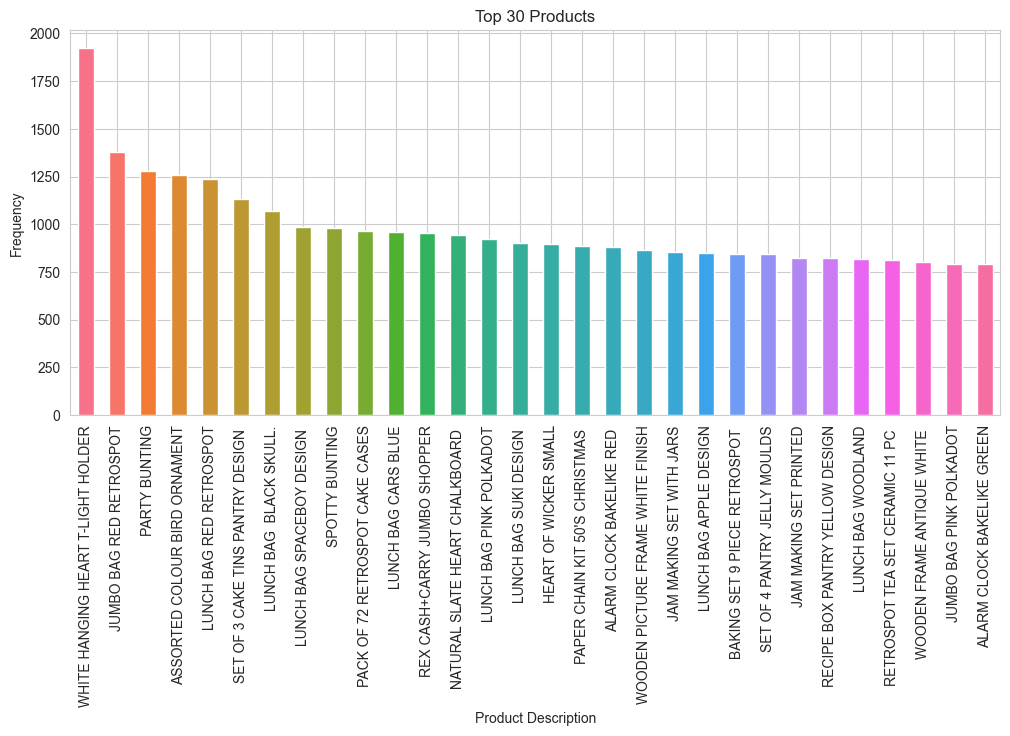

In [125]:



top_30_products = dfv.Description.value_counts().head(30)



colors = sns.color_palette('husl', 30)
top_30_products.plot(kind='bar', figsize=(12, 5), color=colors)
plt.title('Top 30 Products')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


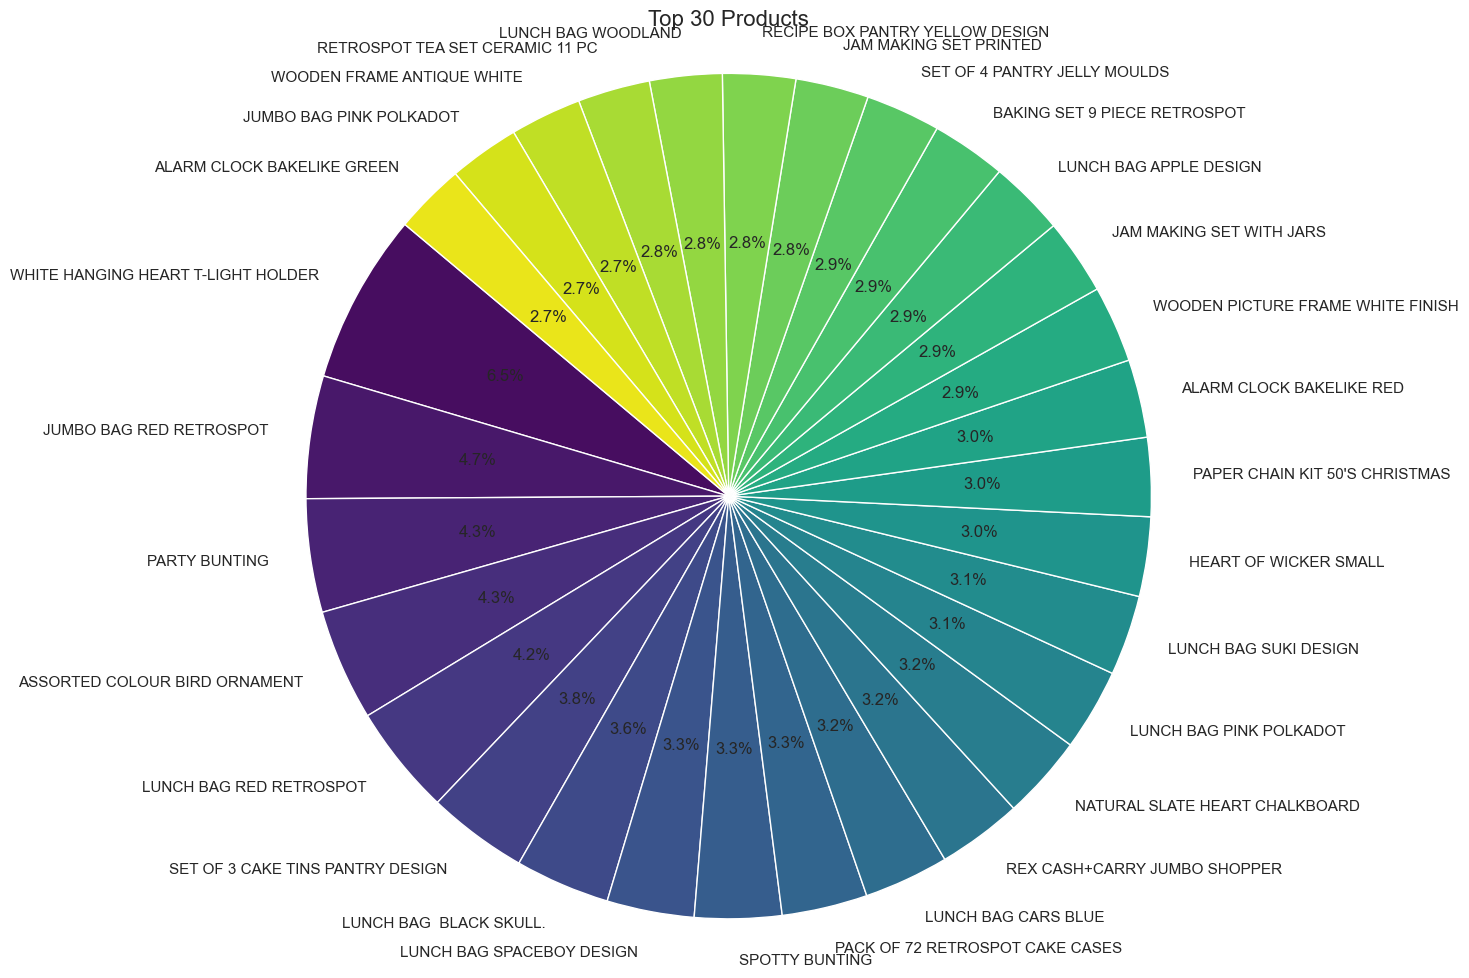

In [155]:
import matplotlib.pyplot as plt

# Calculate the top 30 products correctly
top_30_products = dfv['Description'].value_counts().sort_values(ascending=False)[:30]

# Create a figure with a larger size
plt.figure(figsize=(12, 12))

# Plot the pie chart
plt.pie(top_30_products.values, labels=top_30_products.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_30_products)))

# Set the title
plt.title('Top 30 Products', fontsize=16)

# Ensure the pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()




<Axes: title={'center': 'Last 20 Customers'}>

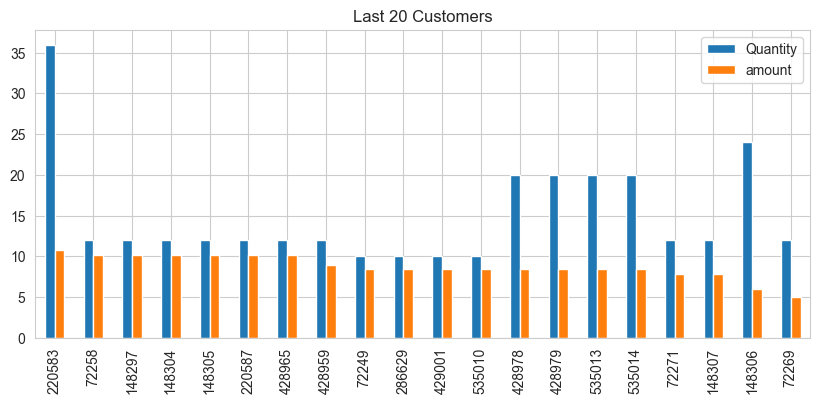

In [118]:
dfv.sort_values(['CustomerID','amount'], ascending=False).drop(['InvoiceDate','InvoiceNo','StockCode','CustomerID','year','month','hour', 'UnitPrice'], axis=1)[-20:].plot(kind='bar', figsize=(10,4), title='Last 20 Customers')

In [119]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


C:\Users\KIIT\AppData\Local\Temp\ipykernel_2992\3072943910.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



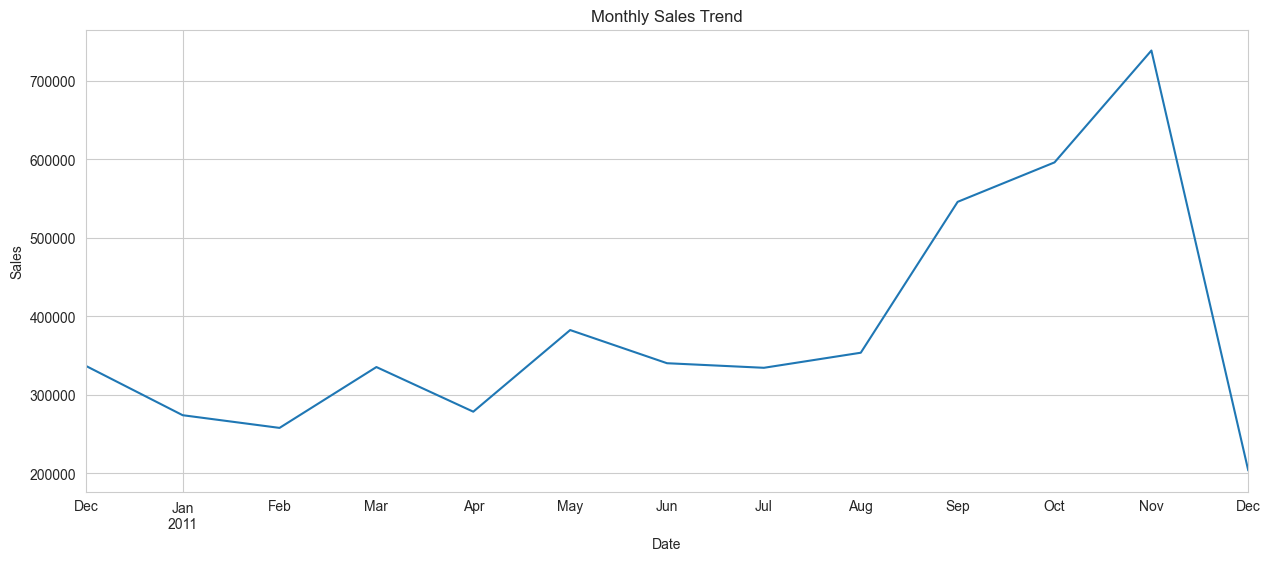

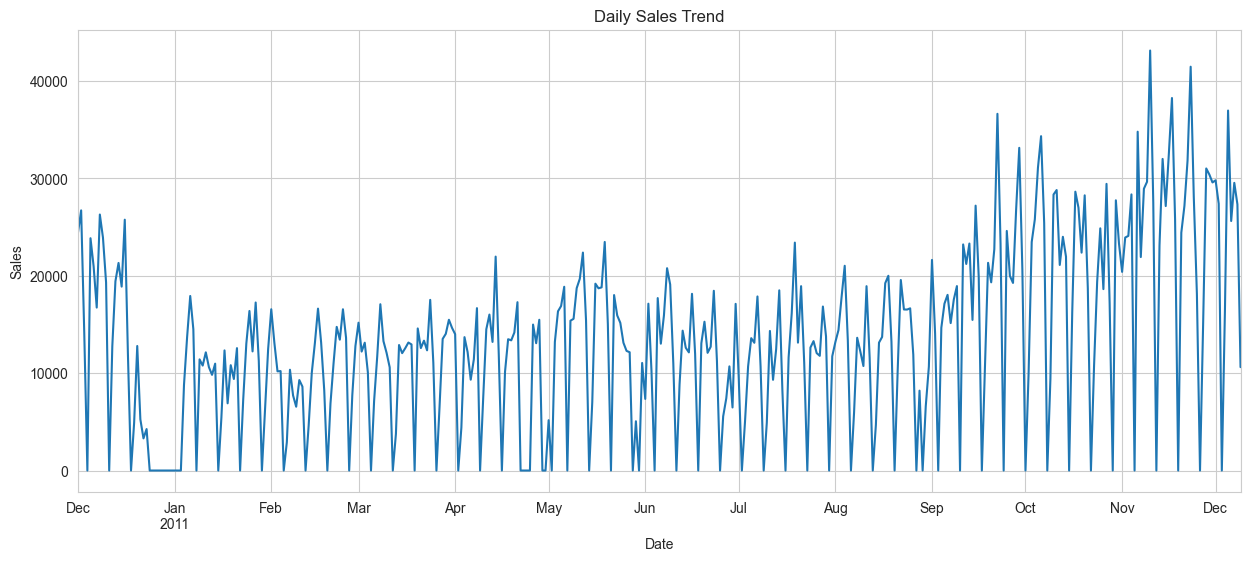

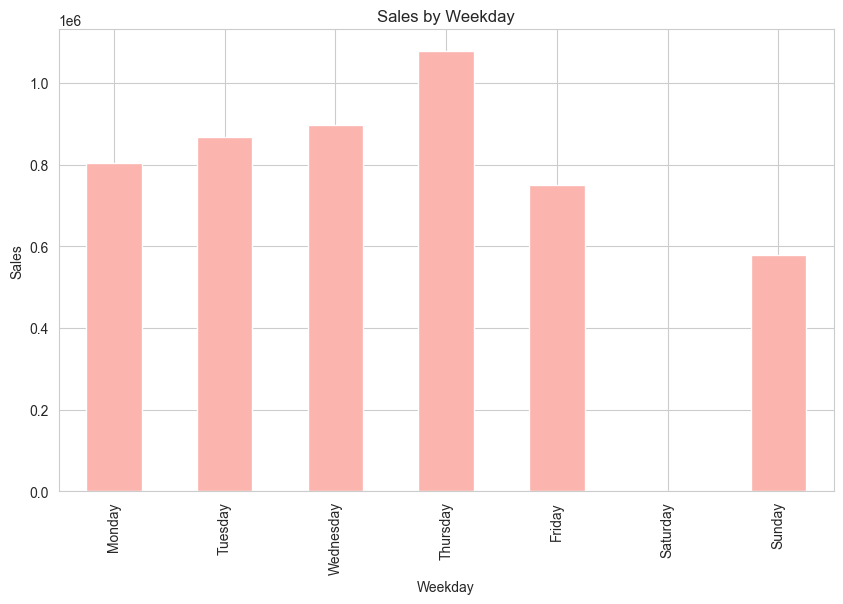

In [120]:
# Ensure the index is set to InvoiceDate
dfv.reset_index(inplace=True)  # Reset index if needed

# Monthly sales trend
dfv.set_index('InvoiceDate', inplace=True)
monthly_sales = dfv['amount'].resample('M').sum()
monthly_sales.plot(kind='line', figsize=(15, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Daily sales trend
daily_sales = dfv['amount'].resample('D').sum()
daily_sales.plot(kind='line', figsize=(15, 6))
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Sales trend by weekday
dfv['Weekday'] = dfv.index.weekday
weekday_sales = dfv.groupby('Weekday')['amount'].sum()

# Ensure all weekdays are present in the index
weekday_sales = weekday_sales.reindex(range(7), fill_value=0)
weekday_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_sales.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
plt.title('Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.show()


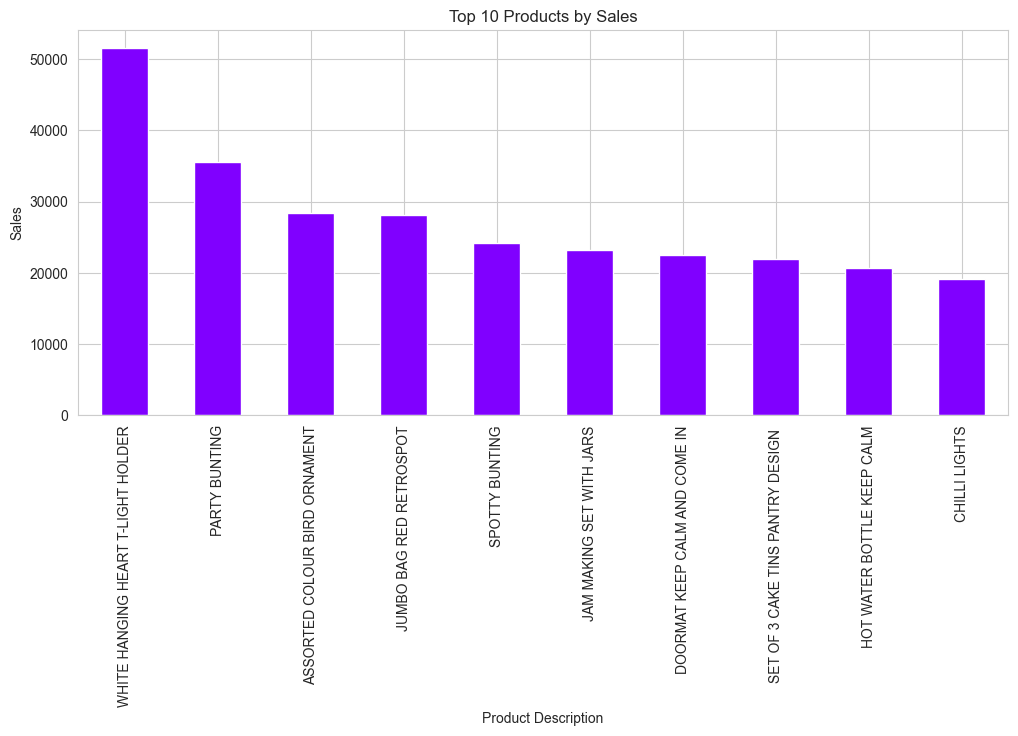

C:\Users\KIIT\AppData\Local\Temp\ipykernel_2992\287930123.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



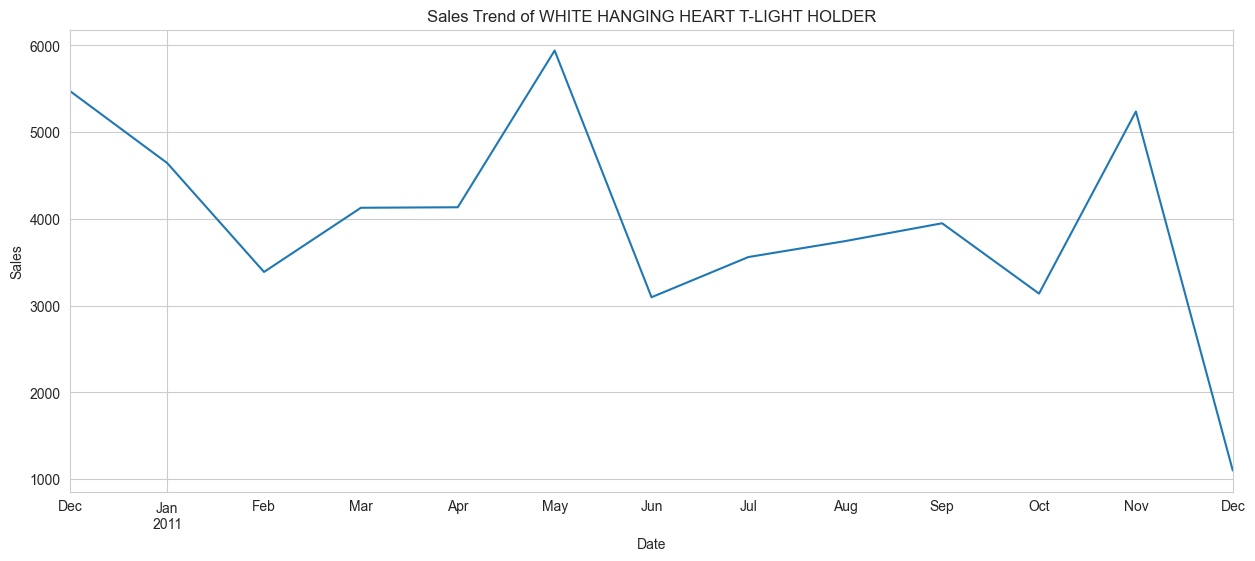

In [121]:
# Top 10 products by sales
top_products = dfv.groupby('Description')['amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12, 5), colormap='rainbow')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Description')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Sales trend of top product
top_product = top_products.index[0]
top_product_sales = dfv[dfv['Description'] == top_product]['amount'].resample('M').sum()
top_product_sales.plot(kind='line', figsize=(15, 6))
plt.title(f'Sales Trend of {top_product}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_2992\3195583455.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



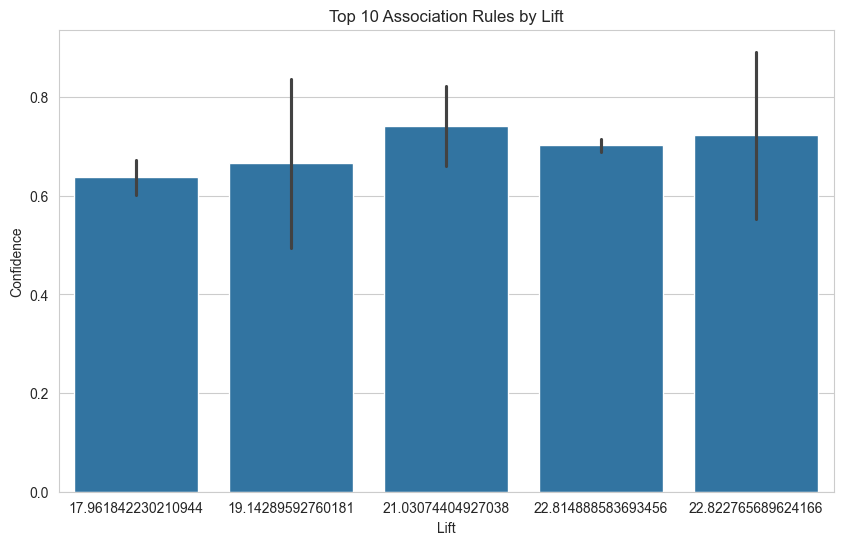

In [122]:
# Prepare data for market basket analysis
basket = dfv[dfv['Quantity'] > 0].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Plot top 10 association rules
rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='confidence', data=rules)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()
